In [148]:
# Plotting library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

# Numerical Library
import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv

from scipy.special import expit

# Image manipulation library
from PIL import Image

# Limit printout to 3 decimal places
np.set_printoptions(precision=3,suppress=True)

# Allows for printing inline for jupyter notebook
%matplotlib inline 

# http://scikit-learn.org/stable/tutorial/machine_learning_map/

In [2]:
# Load datasets and store in ndarray
raw_train = genfromtxt('usps-4-9-train.csv', delimiter=',')
raw_test = genfromtxt('usps-4-9-test.csv', delimiter=',')

In [12]:
print raw_train[:,256][np.newaxis].T

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]


In [13]:
# Split off known target values
y_train = raw_train[:,256]
y_test = raw_test[:,256]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 256 from X
raw_train = np.delete(raw_train, 256, axis=1)
raw_test = np.delete(raw_test, 256, axis=1)

## NOT COMPLETELY SURE WE NEED DUMMY ONES

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
   temp = np.ones(len(target))
   return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(raw_train)
dummy_test = make_dummy_vector(raw_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, raw_train), axis=1)
X_test = np.concatenate((dummy_test, raw_test), axis=1)


# In case we don't need dummy ones
#X_train = raw_train
#X_test = raw_test

In [15]:
# Data for a single sample
print raw_train[0]

[   0.    0.    0.    0.    0.    0.    0.    0.   11.  133.  195.    7.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   12.  120.
  220.  255.  149.    2.    0.    0.    0.    0.    0.    0.    0.   20.
  113.  172.  239.  255.  255.   72.    0.    0.    0.    0.    0.    0.
    0.    0.  122.  255.  253.  174.  105.  155.  255.    3.    0.    0.
    0.    0.    0.    0.    0.   73.  243.  183.   17.    0.    0.  144.
  244.    2.    0.    0.    0.    0.   30.   28.    0.    0.    0.    0.
    0.    0.    0.   98.  201.    0.    0.   15.  102.  179.  255.  174.
    0.    0.    0.    0.    0.    0.    0.  155.  212.   90.  167.  253.
  255.  206.   94.   16.    0.    0.    0.    0.    0.    0.   25.  223.
  255.  239.  139.   64.   43.    0.    0.    0.    0.    0.    0.    0.
   37.  154.  251.  255.  166.   12.    0.    0.    0.    0.    0.    0.
    0.   22.  116.  205.  252.  173.   97.  255.  109.    0.    0.    0.
    0.    0.    0.    0.   90.  248.  198.   93.   

In [19]:
## This is not completely working, we need to figure out why the image seems upside down ##

# Displays a single sample for context
def visualize_sample(data,target):
    temp = np.reshape(data[target],(16,16))
    img = Image.fromarray(temp)
    img.show()
    
# Example call to function
visualize_sample(raw_train, 1200)

In [20]:
# NOT YET NEEDED, INCORRECT FIRST ATTEMPT AT ASSIGNMENT

# Compute optimal weight vector w = (X^T * X)^-1 (X^T * Y)
# def calc_w_vector(X, y):
#     return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

# w_train = calc_w_vector(X_train,y_train)
# w_test = calc_w_vector(X_test,y_test)

# Computer linear regression function
# target_function_train = np.dot(X_test,w_test)
# target_function_test = np.dot(X_test,w_test)

# # Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.plot(target_function_train)
# fig.suptitle('Linear Regression Function for X_train', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# fig = plt.figure(figsize=(9,6))
# plt.plot(target_function_test)
# fig.suptitle('Linear Regression Function for X_test', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# sigmoid_train = calc_sigmoid(target_function_train)
# sigmoid_test = calc_sigmoid(target_function_test)

# # Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.plot(sigmoid_train)
# fig.suptitle('Sigmoid Function for X_train', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# fig = plt.figure(figsize=(9,6))
# plt.plot(sigmoid_test)
# fig.suptitle('Sigmoid Function for X_test', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

In [170]:
# Calculate sigmoid function
def calc_sigmoid(target_function):
    return (1 / (1 + expit(target_function)))

In [171]:
print len(np.arange(0,5,0.5))

10


In [172]:
## Part 1

w_vectors = []
learning_rates = np.arange(0.0001,1.05,0.05) # 10 values between 0 and 5

def batch_learning(X,y,n,lrn_rate,iterations):
    w_batch = np.zeros(len(X[0]))
    
    ## Repeat until convergence  
    ctr = 0
    for i in range(iterations):
        d = np.zeros(len(X[0]))
        #Range argument limits batch size
        while(ctr < 1400):
            for i in range(n):
                y_hat_i = calc_sigmoid((np.dot(w_batch.T,X[ctr])))      
                error = y[i] - y_hat_i
                test = error * X[i]
                d = np.add(d,test)
                ctr += 1
            modified_descent = lrn_rate * d
            w_batch = np.add(w_batch,modified_descent) 
    return w_batch

for i in learning_rates:
    w_vectors.append(batch_learning(X_train,y_train,200,i,1))


## Consider experimenting with alternate convergence conditions
# - Cease to change in objective value
# - norm of the gradient within a threshold

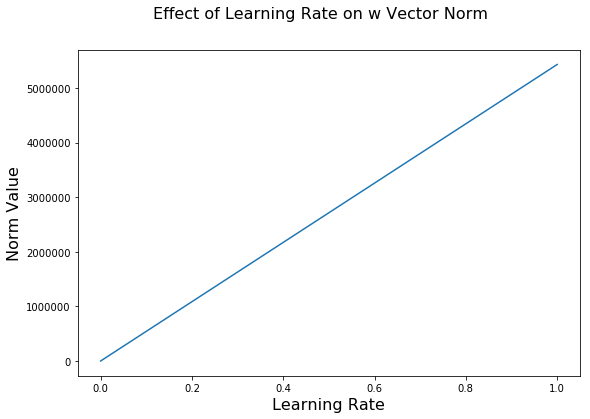

In [173]:
# Experimenting with different learing values

## Thought: Maybe we can use the norm to quantify the effect of the learning rate on our w vector
norms = []

for i in range(len(w_vectors)):
    norms.append(np.linalg.norm(w_vectors[i]))

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(learning_rates,norms)
fig.suptitle('Effect of Learning Rate on w Vector Norm', fontsize=16)
plt.xlabel('Learning Rate', fontsize=16)
plt.ylabel('Norm Value', fontsize=16)

In [174]:
## PART 2
# Good learning rate? Assuming 0.2



for i in range(5):
    w_vectors.append(batch_learning(X_train,y_train,200,i,5))



In [186]:
# Attempt at predicting training data
p =  (expit(w_vectors[0] * X_train[0])) / (1 + expit(w_vectors[0] * X_train[0]))
print p

[ 0.299  0.312  0.183  0.092  0.019  0.001  0.     0.     0.     0.     0.
  0.001  0.094  0.222  0.212  0.001  0.     0.233  0.007  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.001  0.008  0.     0.     0.
  0.158  0.001  0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.101  0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.003
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.002  0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.002  0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.006  0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.003  0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.001  0.002 

In [167]:
print w_vectors[0][np.newaxis].T.shape
print X_train[0][np.newaxis].shape

(257L, 1L)
(1L, 257L)


In [144]:
print w_vectors[2]

[   -70.07     -46.947   -231.932   -360.861   -581.231   -971.17
  -1929.377  -3127.925  -4009.055  -3457.955  -1649.097   -992.892
   -358.058   -181.832   -195.145   -935.435  -1089.589   -168.168
   -707.707  -1397.196  -2731.329  -4626.722  -7252.595  -9320.711
 -10114.955  -8573.415  -4679.975  -2410.758   -986.936   -695.445
  -1627.025  -2471.019  -1371.27    -264.164   -989.739  -2531.629
  -4510.406  -6772.266  -9051.643 -10467.407 -10561.651  -8752.794
  -5193.238  -2595.393  -1497.396  -2160.608  -2808.756  -2578.576
  -1228.677   -345.445  -1953.201  -3434.481  -5233.178  -6650.694
  -7648.841  -8216.408  -8524.366  -7965.908  -5200.595  -3089.737
  -2968.866  -3139.486  -3057.855  -2670.368  -1442.391   -805.455
  -2496.944  -4085.782  -5216.361  -5921.966  -5385.23   -5558.303
  -7258.902  -7326.169  -5650.445  -4555.601  -3987.684  -3597.394
  -3302.749  -3585.482  -2022.571   -862.912  -2448.947  -4119.065
  -4723.419  -3917.964  -3219.016  -4074.921  -6195.589  -7457.